# Time Series Analysis in Python

## With Applications of Machine Learning Algorithms

In [167]:
#!pip install fxcmpy --user

## The Imports

In [327]:
import numpy as np
import pandas as pd
from pylab import plt
plt.style.use('seaborn')
%matplotlib inline

## The Data

In [328]:
data = pd.read_csv('eurusd.csv')

In [329]:
data.head()

,Date,Time,OpenBid,HighBid,LowBid,CloseBid,OpenAsk,HighAsk,LowAsk,CloseAsk,TotalTicks
0,6/3/2007,21:00:00,1.34456,1.34986,1.34316,1.34886,1.34474,1.35004,1.34334,1.34904,5259
1,6/4/2007,21:00:00,1.34886,1.35536,1.34876,1.35226,1.34904,1.35554,1.34894,1.35244,6110
2,6/5/2007,21:00:00,1.35226,1.35376,1.34846,1.35026,1.35244,1.35394,1.34864,1.35044,5875
3,6/6/2007,21:00:00,1.35026,1.35116,1.34216,1.34326,1.35044,1.35134,1.34234,1.34344,7361
4,6/7/2007,21:00:00,1.34326,1.34356,1.33196,1.33676,1.34344,1.34374,1.33214,1.33694,8238


In [330]:
data = pd.read_csv('eurusd.csv',
                   index_col=0, parse_dates=True)

In [331]:
data.tail()

,Time,OpenBid,HighBid,LowBid,CloseBid,OpenAsk,HighAsk,LowAsk,CloseAsk,TotalTicks
Date,,,,,,,,,,
2017-05-27,21:00:00,1.11784,1.11784,1.11677,1.11681,1.11808,1.11808,1.11743,1.11788,48
2017-05-28,21:00:00,1.11681,1.11894,1.11613,1.11622,1.11788,1.11906,1.11626,1.11660,119787
2017-05-29,21:00:00,1.11622,1.12048,1.11087,1.11842,1.11660,1.12064,1.11100,1.11882,285165
2017-05-30,21:00:00,1.11842,1.12517,1.11638,1.12418,1.11882,1.12530,1.11651,1.12434,293536
2017-05-31,21:00:00,1.12418,1.12562,1.11997,1.12103,1.12434,1.12574,1.12027,1.12133,235113


In [332]:
data.index

DatetimeIndex(['2007-06-03', '2007-06-04', '2007-06-05', '2007-06-06',
               '2007-06-07', '2007-06-10', '2007-06-11', '2007-06-12',
               '2007-06-13', '2007-06-14',
               ...
               '2017-05-21', '2017-05-22', '2017-05-23', '2017-05-24',
               '2017-05-25', '2017-05-27', '2017-05-28', '2017-05-29',
               '2017-05-30', '2017-05-31'],
              dtype='datetime64[ns]', name='Date', length=2820, freq=None)

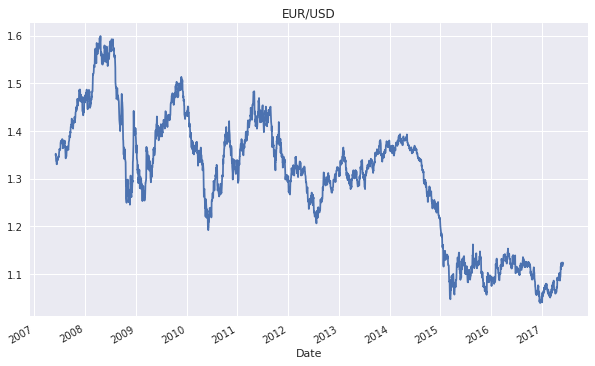

In [333]:
data['CloseAsk'].plot(figsize=(10, 6), title='EUR/USD');

## SMA-Based Strategy &mdash; Mid Points

In [334]:
data = data[['CloseAsk', 'CloseBid']]

In [335]:
data.head()

,CloseAsk,CloseBid
Date,,
2007-06-03,1.34904,1.34886
2007-06-04,1.35244,1.35226
2007-06-05,1.35044,1.35026
2007-06-06,1.34344,1.34326
2007-06-07,1.33694,1.33676


In [336]:
data['Mid'] = data.mean(axis=1)

In [337]:
# data['Mid'] = (data['CloseAsk'] + data['CloseBid']) / 2 

In [338]:
data.head()

,CloseAsk,CloseBid,Mid
Date,,,
2007-06-03,1.34904,1.34886,1.34895
2007-06-04,1.35244,1.35226,1.35235
2007-06-05,1.35044,1.35026,1.35035
2007-06-06,1.34344,1.34326,1.34335
2007-06-07,1.33694,1.33676,1.33685


In [339]:
data['SMA1'] = data['Mid'].rolling(10).mean()

In [340]:
data['SMA2'] = data['Mid'].rolling(60).mean()

In [341]:
data.head()

,CloseAsk,CloseBid,Mid,SMA1,SMA2
Date,,,,,
2007-06-03,1.34904,1.34886,1.34895,NaN,NaN
2007-06-04,1.35244,1.35226,1.35235,NaN,NaN
2007-06-05,1.35044,1.35026,1.35035,NaN,NaN
2007-06-06,1.34344,1.34326,1.34335,NaN,NaN
2007-06-07,1.33694,1.33676,1.33685,NaN,NaN


In [342]:
data.tail()

,CloseAsk,CloseBid,Mid,SMA1,SMA2
Date,,,,,
2017-05-27,1.11788,1.11681,1.117345,1.118674,1.086009
2017-05-28,1.11660,1.11622,1.116410,1.118721,1.086715
2017-05-29,1.11882,1.11842,1.118620,1.119559,1.087340
2017-05-30,1.12434,1.12418,1.124260,1.119908,1.088081
2017-05-31,1.12133,1.12103,1.121180,1.120058,1.088793


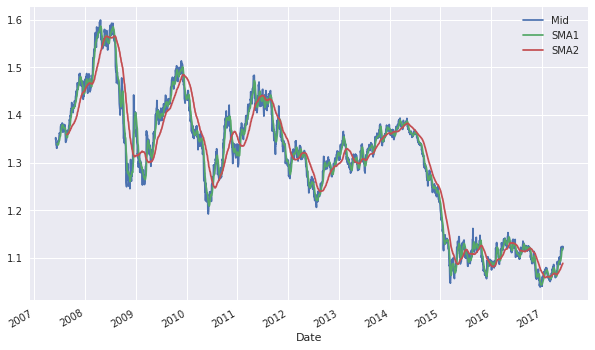

In [343]:
data[['Mid', 'SMA1', 'SMA2']].plot(figsize=(10, 6));

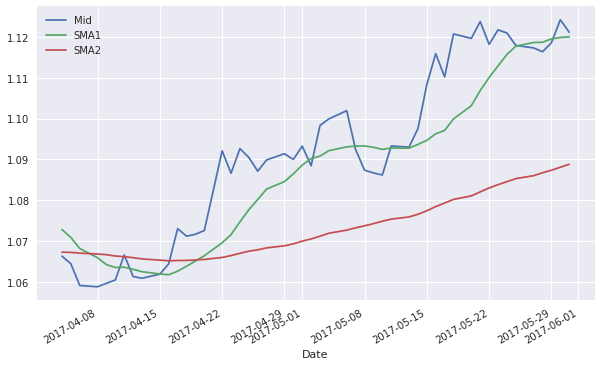

In [344]:
data[['Mid', 'SMA1', 'SMA2']].iloc[-50:].plot(figsize=(10, 6));

In [345]:
# long position = +1 | short position = -1
data['SMAPosition'] = np.where(data['SMA1'] > data['SMA2'], 1, -1) 

In [346]:
data.tail()

,CloseAsk,CloseBid,Mid,SMA1,SMA2,SMAPosition
Date,,,,,,
2017-05-27,1.11788,1.11681,1.117345,1.118674,1.086009,1
2017-05-28,1.11660,1.11622,1.116410,1.118721,1.086715,1
2017-05-29,1.11882,1.11842,1.118620,1.119559,1.087340,1
2017-05-30,1.12434,1.12418,1.124260,1.119908,1.088081,1
2017-05-31,1.12133,1.12103,1.121180,1.120058,1.088793,1


In [347]:
data.dropna(inplace=True)

In [348]:
data = data[data.index > '2014-1-1']

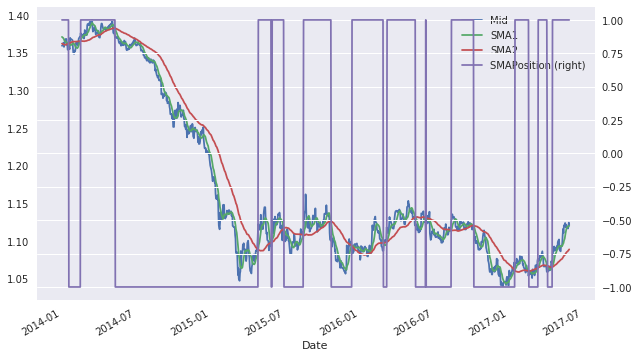

In [349]:
data[['Mid', 'SMA1', 'SMA2', 'SMAPosition']].plot(figsize=(10, 6),
                                                 secondary_y='SMAPosition');

In [350]:
data['Returns'] = np.log(data['Mid'] / data['Mid'].shift(1))

In [351]:
data.head()

,CloseAsk,CloseBid,Mid,SMA1,SMA2,SMAPosition,Returns
Date,,,,,,,
2014-01-02,1.35931,1.35886,1.359085,1.370810,1.361908,1,NaN
2014-01-04,1.35965,1.35905,1.359350,1.370015,1.361563,1,0.000195
2014-01-05,1.36286,1.36270,1.362780,1.369332,1.361270,1,0.002520
2014-01-06,1.36163,1.36148,1.361555,1.368733,1.360950,1,-0.000899
2014-01-07,1.35755,1.35748,1.357515,1.367574,1.360600,1,-0.002972


In [352]:
np.log(1.359350 / 1.359085)

0.00019496511841510917

In [353]:
data['SMAStrategy'] = data['SMAPosition'].shift(1) * data['Returns'] 

In [354]:
data.head()

,CloseAsk,CloseBid,Mid,SMA1,SMA2,SMAPosition,Returns,SMAStrategy
Date,,,,,,,,
2014-01-02,1.35931,1.35886,1.359085,1.370810,1.361908,1,NaN,NaN
2014-01-04,1.35965,1.35905,1.359350,1.370015,1.361563,1,0.000195,0.000195
2014-01-05,1.36286,1.36270,1.362780,1.369332,1.361270,1,0.002520,0.002520
2014-01-06,1.36163,1.36148,1.361555,1.368733,1.360950,1,-0.000899,-0.000899
2014-01-07,1.35755,1.35748,1.357515,1.367574,1.360600,1,-0.002972,-0.002972


In [355]:
data[['Returns', 'SMAStrategy']].cumsum().iloc[-1]

Returns       -0.19243
SMAStrategy    0.11163
Name: 2017-05-31 00:00:00, dtype: float64

In [356]:
np.exp(data[['Returns', 'SMAStrategy']].cumsum().iloc[-1])

Returns        0.824952
SMAStrategy    1.118099
Name: 2017-05-31 00:00:00, dtype: float64

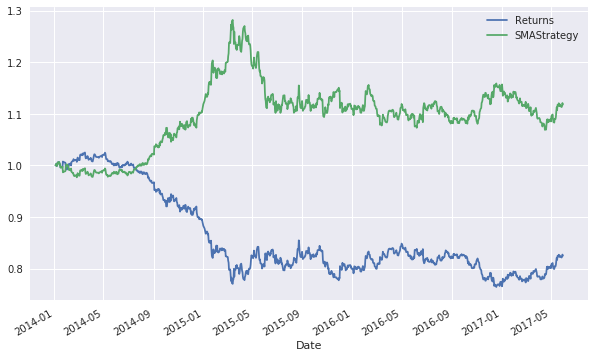

In [357]:
data[['Returns', 'SMAStrategy']].dropna().cumsum().apply(np.exp).plot(
                                figsize=(10, 6));